Project 1 - Course COMP8720

Our Group members:

    Kimia Tahayori          110124141
    Siyam Sajnan Chowdhury  110124636

1. Load both MNIST-DIGITS and MNIST-Fashion Datasets
2. Plot a sample of each class

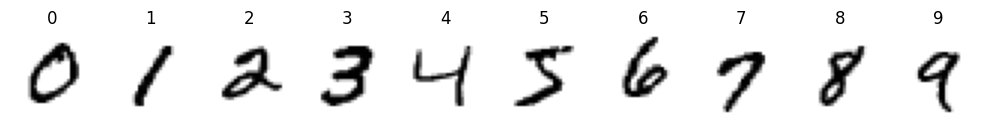

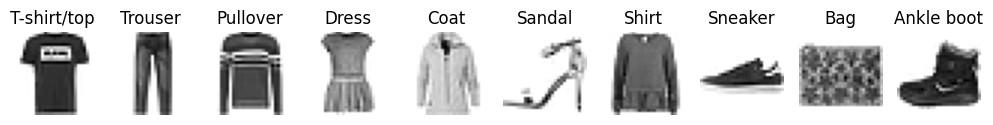

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


# Load MNIST digits and Fashion datasets
mnist_digits = tf.keras.datasets.mnist
(train_images_digits, train_labels_digits), (test_images_digits, test_labels_digits) = mnist_digits.load_data()

mnist_fashion = tf.keras.datasets.fashion_mnist
(train_images_fashion, train_labels_fashion), (test_images_fashion, test_labels_fashion) = mnist_fashion.load_data()

# plotting a sample of each class
def display_sample(images, labels, class_name):
    unique_labels = np.unique(labels)            # Get unique labels from the label list
    fig, axes = plt.subplots(1, len(unique_labels), figsize=(10, 2))    # Create a subplot for each unique label

    for lbl, ax in zip(unique_labels, axes):     # For each unique label, display an image of that class
        idx = np.where(labels == lbl)[0][0]      # Find the first image of this label
        ax.imshow(images[idx], cmap='binary')    # Display the image
        ax.set_title(class_name[lbl])            # Set the title to the corresponding class name
        ax.axis('off')

    plt.tight_layout()                           # Adjust layout
    plt.show()

# plotting samples of MNIST digits
digit_class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
display_sample(train_images_digits, train_labels_digits, digit_class_names)

# plotting samples of MNIST fashion
fashion_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
display_sample(train_images_fashion, train_labels_fashion, fashion_class_names)

Preprocessing

In [ ]:
# Preprocessing of the data for both datasets (each image is 28*28 gray scale image)
train_images_digits = train_images_digits.reshape(-1, 28, 28, 1).astype('float32') / 255    # Reshape and normalize the training images
test_images_digits = test_images_digits.reshape(-1, 28, 28, 1).astype('float32') / 255      # Reshape and normalize the test images

train_images_fashion = train_images_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255  # Reshape and normalize the training images
test_images_fashion = test_images_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255    # Reshape and normalize the test images


Defining the CNN architecture

In [ ]:
# Defining the CNN architecture (two convolutional layers)
def create_cnn_model():
    model = tf.keras.Sequential([
        #First layer
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),      # 32 filters, each of size 3x3
        tf.keras.layers.MaxPooling2D(2, 2),                                                 # Max pooling with 2x2 grid

        #Second layer
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),                               # 64 filters, each of size 3x3
        tf.keras.layers.MaxPooling2D(2, 2),                                                 # Max pooling with 2x2 grid

        # Flatten the results
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),                                      # Dense layer with 128 neurons

        # Final output layer
        tf.keras.layers.Dense(10, activation='softmax')                                     # Softmax activation to get probabilities
    ])

    # Compile the model with Adam optimizer, and sparse categorical crossentropy as the loss function
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

Train and evaluate the model for MNIST digits

In [ ]:
model_digits = create_cnn_model()                                                                   # Create the CNN model for the MNIST digits
model_digits.fit(train_images_digits, train_labels_digits, epochs=5, batch_size=64)                 # Train the model
test_loss_digits, test_acc_digits = model_digits.evaluate(test_images_digits, test_labels_digits)   # Evaluate the trained model on the MNIST digits test data
print("\nAccuracy on MNIST digits:", test_acc_digits)                                               # Print the accuracy

Epoch 1/5
938/938 [==============================] - 33s 34ms/step - loss: 0.1564 - accuracy: 0.9530
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 31s 34ms/step - loss: 0.0323 - accuracy: 0.9896
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0250 - accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.0225 - accuracy: 0.9923

Accuracy on MNIST digits: 0.9922999739646912


Train and evaluate the model for MNIST fashion

In [ ]:
model_fashion = create_cnn_model()                                                                       # Create the CNN model for the MNIST Fashion
model_fashion.fit(train_images_fashion, train_labels_fashion, epochs=5, batch_size=64)                   # Train the model
test_loss_fashion, test_acc_fashion = model_fashion.evaluate(test_images_fashion, test_labels_fashion)   # Evaluate the trained model on the MNIST Fashion test data
print("\nAccuracy on MNIST fashion:", test_acc_fashion)                                                  # Print the accuracy

Epoch 1/5
938/938 [==============================] - 25s 26ms/step - loss: 0.4999 - accuracy: 0.8185
Epoch 2/5
938/938 [==============================] - 26s 27ms/step - loss: 0.3215 - accuracy: 0.8832
Epoch 3/5
938/938 [==============================] - 25s 27ms/step - loss: 0.2751 - accuracy: 0.8992
Epoch 4/5
938/938 [==============================] - 25s 27ms/step - loss: 0.2442 - accuracy: 0.9105
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2677 - accuracy: 0.9030

Accuracy on MNIST fashion: 0.902999997138977


Plotting the Confusion Matrix for MNIST Digits

313/313 [==============================] - 2s 7ms/step


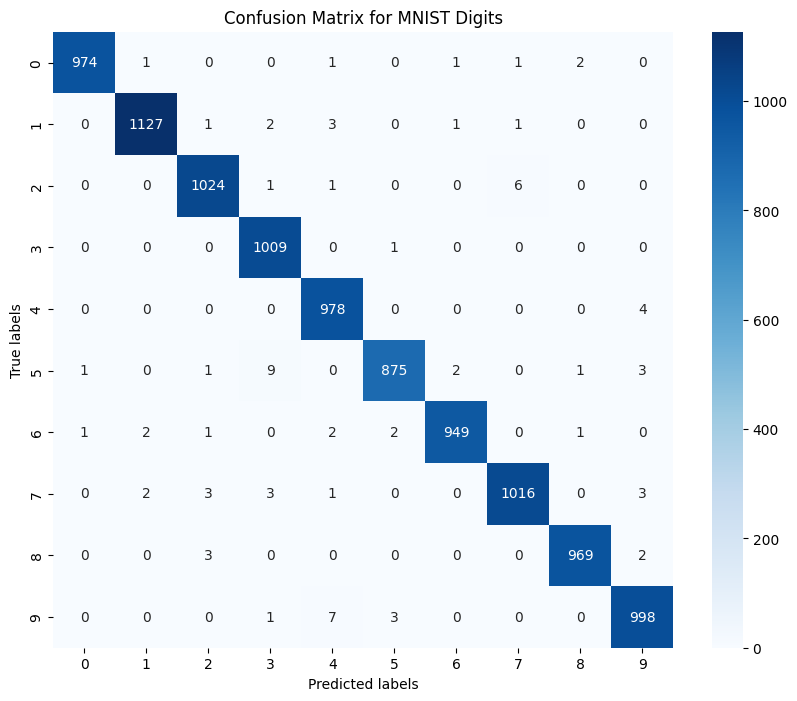

In [ ]:
predictions_digits = model_digits.predict(test_images_digits)                        # Get the model's predictions for the MNIST digits
cm = confusion_matrix(test_labels_digits, np.argmax(predictions_digits, axis=1))     # Calculate the confusion matrix using true labels and predicted labels
plt.figure(figsize=(10, 8))                                                          # Set the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")                                   # Annotate each cell with the numeric value using fmt
plt.xlabel('Predicted labels')                                                       # Set the x axis label
plt.ylabel('True labels')                                                            # Set the y axis label
plt.title('Confusion Matrix for MNIST Digits')                                       # Set the title for the heatmap
plt.show()


Plotting the Confusion Matrix for MNIST Fashion

313/313 [==============================] - 2s 6ms/step


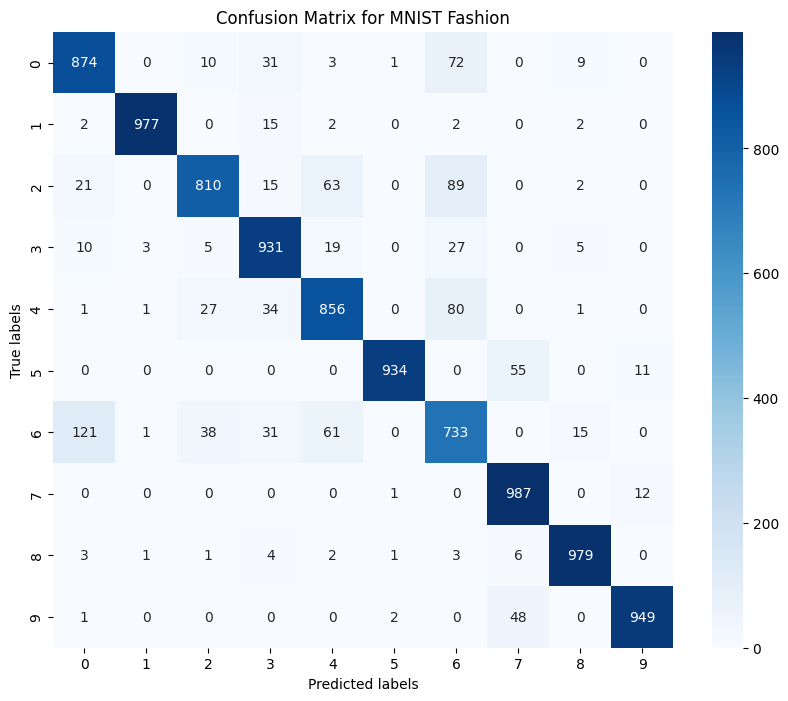

In [ ]:
predictions_fashion = model_fashion.predict(test_images_fashion)                    # Get the model's predictions for the MNIST Fashion
cm = confusion_matrix(test_labels_fashion, np.argmax(predictions_fashion, axis=1))  # Calculate the confusion matrix using true labels and predicted labels
plt.figure(figsize=(10, 8))                                                         # Set the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")                                  # Annotate each cell with the numeric value using fmt
plt.xlabel('Predicted labels')                                                      # Set the x axis label
plt.ylabel('True labels')                                                           # Set the y axis label
plt.title('Confusion Matrix for MNIST Fashion')                                     # Set the title for the heatmap
plt.show()

Classification Report for MNIST Digits


In [ ]:
# Print the classification report for MNIST digits dataset
print("Classification Report for MNIST Digits:")

# The classification_report function computes various classification metrics like precision, recall
# test_labels_digits are the true labels
# np.argmax(predictions_digits, axis=1) gives the predicted labels by selecting the label with the highest probability
print(classification_report(test_labels_digits, np.argmax(predictions_digits, axis=1)))

Classification Report for MNIST Digits:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Classification Report for MNIST Fashion

In [ ]:
# Print the classification report for MNIST Fashion dataset
print("Classification Report for MNIST Fashion:")

# The classification_report function computes various classification metrics like precision, recall
# test_labels_digits are the true labels
# np.argmax(predictions_digits, axis=1) gives the predicted labels by selecting the label with the highest probability
print(classification_report(test_labels_fashion, np.argmax(predictions_fashion, axis=1)))

Classification Report for MNIST Fashion:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.81      0.86      1000
           3       0.88      0.93      0.90      1000
           4       0.85      0.86      0.85      1000
           5       0.99      0.93      0.96      1000
           6       0.73      0.73      0.73      1000
           7       0.90      0.99      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

